<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/6States_labeling_CDC_Guideline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [8]:
!pip install wget
import wget

# Load County Population


In [4]:
county_population_US = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv',low_memory=False)
print(county_population_US.shape)

(3195, 4)


In [9]:
wget.download('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')
county_population_US = pd.read_csv('covid_county_population_usafacts.csv',low_memory=False)
print(county_population_US.shape)


(3195, 4)


In [10]:
county_population_US.head(2)

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869


# Load Combined Dataset

In [11]:
CA_combined_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_combined_Sep25.csv',low_memory=False)
CA_combined_data.head()

FileNotFoundError: ignored

In [ ]:
CA_combined_data['New Cases/1k population'] = CA_combined_data['New cases']*1000/ CA_combined_data['population']
CA_combined_data.tail(2)

,Date,fips_x,County Name,population,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,New Cases/1k population
9194,2020-08-20,6115,Yuba County,78668,0.0,0.0,0.0,0.0,-33.0,8.0,59.48,4.096,43,124.506204,1,0.669,0,0.000000
9195,2020-08-21,6115,Yuba County,78668,0.0,0.0,0.0,0.0,-33.0,10.0,84.31,5.820,61,124.506204,1,0.669,8,0.101693


# Apply for all counties

In [ ]:
county_names = CA_combined_data['County Name'].unique()

In [ ]:
for county in county_names:
    print('county name: ',county)
    county_data = CA_combined_data[CA_combined_data['County Name']== county]
    new_cases_1k_la_list = county_data['New Cases/1k population'].values
    diffArr = np.diff(new_cases_1k_la_list)
    growth_values =[]
    growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
    growth_values.extend(diffArr)
    county_data['growth_values'] = growth_values

    minVal = np.min(growth_values)
    maxVal = np.max(growth_values)
    meanVal= np.mean(growth_values, axis=0)
    stdVal = np.std(growth_values, axis=0)
    debug = False
    if debug:
      print("min : ",minVal)
      print("max : ",maxVal)
      print('Mean: ', np.mean(growth_values, axis=0))
      print('Standard Deviation:', np.std(growth_values, axis=0))
      print('. (meanVal + (stdVal * 1) / 3). ',(meanVal + (stdVal * 1) / 3))
      print('. (meanVal - (stdVal * 1) / 3). ',(meanVal - (stdVal * 1) / 3))
      print('. (meanVal + (stdVal * 2) / 3). ',(meanVal + (stdVal * 2) / 3))
      print('. (meanVal - (stdVal * 2) / 3). ',(meanVal - (stdVal * 2) / 3))
      print('. (meanVal + (stdVal * 3) / 3). ',(meanVal + (stdVal * 3) / 3))
      print('. (meanVal - (stdVal * 3) / 3). ',(meanVal - (stdVal * 3) / 3))
      print("min : ",minVal)
      print('. (meanVal - (stdVal * 1) / 2). ',(meanVal - (stdVal * 1) / 2))
      print('. (meanVal - (stdVal * 2) / 2). ',(meanVal - (stdVal * 2) / 2))
      print('. (meanVal - (stdVal * 3) / 2). ',(meanVal - (stdVal * 3) / 2))

      print("max : ",maxVal)
      print('. (meanVal + (stdVal * 1) / 2). ',(meanVal + (stdVal * 1) / 2))
      print('. (meanVal + (stdVal * 2) / 2). ',(meanVal + (stdVal * 2) / 2))
      print('. (meanVal + (stdVal * 3) / 2). ',(meanVal + (stdVal * 3) / 2))

      print("min : ",minVal)
      print('. (meanVal - (stdVal * 1)). ',(meanVal - (stdVal * 1)))
      print('. (meanVal - (stdVal * 2)). ',(meanVal - (stdVal * 2)))
      print('. (meanVal - (stdVal * 3)). ',(meanVal - (stdVal * 3)))

      print("max : ",maxVal)
      print('. (meanVal + (stdVal * 1)). ',(meanVal + (stdVal * 1)))
      print('. (meanVal + (stdVal * 2)). ',(meanVal + (stdVal * 2)))
      print('. (meanVal + (stdVal * 3)). ',(meanVal + (stdVal * 3)))


    for index, row in (county_data.iterrows()):

      i = row['growth_values']

      if  i > (meanVal + (stdVal * 2) / 3) :
          #print("Label: ", i, "drastic_growth")
          label =  'drastic_growth'
      elif ( i > (meanVal + (stdVal * 1) / 3) and i <= (meanVal + (stdVal * 2) / 3)):
          #print("Label: ", i, "mild_growth")
          label =  'mild_growth'
      elif (i >= (meanVal - (stdVal * 1) / 3) and i <= (meanVal + (stdVal * 1) / 3)):
          #print("Label: ", i, "flat_growth")
          label = 'flat_growth'
      elif (i < (meanVal - (stdVal * 1) / 3) and i >= (meanVal - (stdVal * 2) / 3)):
          #print("Label: ", i, "mild_decrement")
          label = 'mild_decrement'
      elif (i < (meanVal - (stdVal * 2) / 3)):
          #print("Label: ", i, "drastic_decrement")
          label = 'drastic_decrement'
    
      date = row['Date']
      #print(i,county, date, label)

      df_index = (CA_combined_data['County Name'] == county) & (CA_combined_data['Date'] == date) 
      #print(df_weekData)
      CA_combined_data.loc[df_index,'growth_label'] = label
    #break

county name:  Alameda County


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


county name:  Amador County
county name:  Butte County
county name:  Calaveras County
county name:  Colusa County
county name:  Contra Costa County
county name:  Del Norte County
county name:  El Dorado County
county name:  Fresno County
county name:  Glenn County
county name:  Humboldt County
county name:  Imperial County
county name:  Inyo County
county name:  Kern County
county name:  Kings County
county name:  Lake County
county name:  Lassen County
county name:  Los Angeles County
county name:  Madera County
county name:  Marin County
county name:  Mariposa County
county name:  Mendocino County
county name:  Merced County
county name:  Mono County
county name:  Monterey County
county name:  Napa County
county name:  Nevada County
county name:  Orange County
county name:  Placer County
county name:  Plumas County
county name:  Riverside County
county name:  Sacramento County
county name:  San Benito County
county name:  San Bernardino County
county name:  San Diego County
county na

### Verifying with plot

['flat_growth' 2 'mild_decrement' 3 'drastic_growth' 1 'drastic_decrement'
 0 'mild_growth' 4]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


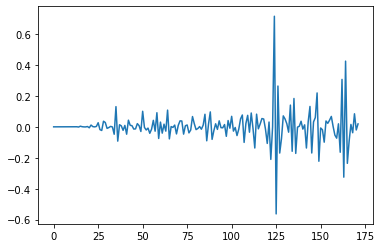

(102, 20)


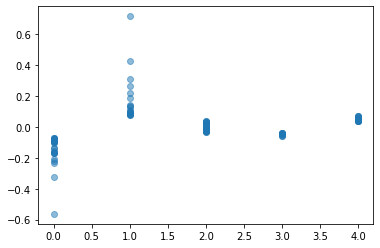

In [ ]:
alameda_data = CA_combined_data[CA_combined_data['County Name'] == 'Los Angeles County']

new_cases_1k_la_list = alameda_data['New Cases/1k population'].values
diffArr = np.diff(new_cases_1k_la_list)
growth_values =[]
growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
growth_values.extend(diffArr)

alameda_data['growth_code'] = alameda_data['growth_label'].astype('category').cat.codes
print(pd.unique(alameda_data[['growth_label', 'growth_code']].values.ravel()))
new_cases_1k_la_list = alameda_data['New Cases/1k population'].values
plt.plot(growth_values)
plt.show()
alameda_labelflat_growth = alameda_data[alameda_data['growth_label'] == 'flat_growth']
print(alameda_labelflat_growth.shape)
#alameda_labelflat_growth

N = 5
x = alameda_data['growth_code'].values
y = growth_values #alameda_data['New Cases/1k population'].values
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


## Export to CSV file to drive

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/'
filename = 'CA_labeledData_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
CA_combined_data.to_csv(location+filename,index=False)

CA_labeledData_Oct11.csv


## 1.Filter-Los Angeles County

In [ ]:
CA_combined_data_test_la = CA_combined_data[CA_combined_data['County Name']== 'Los Angeles County']
CA_combined_data_test_la.head(3)

,Date,fips_x,County Name,population,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,New Cases/1k population,growth_label
2924,2020-03-01,6037,Los Angeles County,10039107,4.0,3.0,-5.0,-3.0,1.0,0.0,-4.36,3.996,60,2473.978284,0,0.0,0,0.0,flat_growth
2925,2020-03-02,6037,Los Angeles County,10039107,5.0,5.0,8.0,1.0,4.0,-1.0,7.51,6.502,98,2473.978284,0,0.0,0,0.0,flat_growth
2926,2020-03-03,6037,Los Angeles County,10039107,8.0,7.0,32.0,2.0,3.0,-1.0,17.24,6.591,99,2473.978284,0,0.0,0,0.0,flat_growth


In [ ]:
new_cases_1k_la_list = CA_combined_data_test_la ['New Cases/1k population'].values

### Finding mean, std. dev

In [ ]:
meanVal= np.mean(new_cases_1k_la_list, axis=0)
stdVal = np.std(new_cases_1k_la_list, axis=0)
print('Mean: ', np.mean(new_cases_1k_la_list, axis=0))
print('Standard Deviation:', np.std(new_cases_1k_la_list, axis=0))

Mean:  0.13074045747898344
Standard Deviation: 0.11493892995460023


### Method to compute normal distribution to label the data 

In [ ]:
  def determine_growth_label_stdev(i,meanVal,stdVal):
    if (i > (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "drastic_growth")
        return 'drastic_growth'
    elif ( i > (meanVal) and i <= (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "mild_growth")
        return 'mild_growth'
    elif (i >= (meanVal - (stdVal * 1) / 3) and i <= meanVal):
        #print("Label: ", i, "flat_growth")
        return 'flat_growth'
    elif (i < (meanVal - (stdVal * 1) / 3) and i >= (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "mild_decrement")
        return 'mild_decrement'
    elif (i < (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "drastic_decrement")
        return 'drastic_decrement'
    

In [ ]:
CA_combined_data_test_la['growth_label'] = CA_combined_data_test_la['New Cases/1k population'].apply(lambda x: determine_growth_label_stdev(x,meanVal,stdVal) )
CA_combined_data_test_la.head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,fips_x,County Name,population,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,New Cases/1k population,growth_label
2924,2020-03-01,6037,Los Angeles County,10039107,4.0,3.0,-5.0,-3.0,1.0,0.0,-4.36,3.996,60,2473.978284,0,0.0,0,0.000000,drastic_decrement
2925,2020-03-02,6037,Los Angeles County,10039107,5.0,5.0,8.0,1.0,4.0,-1.0,7.51,6.502,98,2473.978284,0,0.0,0,0.000000,drastic_decrement
2926,2020-03-03,6037,Los Angeles County,10039107,8.0,7.0,32.0,2.0,3.0,-1.0,17.24,6.591,99,2473.978284,0,0.0,0,0.000000,drastic_decrement
2927,2020-03-04,6037,Los Angeles County,10039107,4.0,6.0,9.0,-1.0,2.0,0.0,13.82,6.595,100,2473.978284,0,0.0,6,0.000598,drastic_decrement


In [ ]:
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'drastic_growth'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'mild_decrement'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'drastic_decrement'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'mild_growth'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'flat_growth'].shape)


(55, 19)
(26, 19)
(50, 19)
(17, 19)
(24, 19)


In [ ]:
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'drastic_growth'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'mild_decrement'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'drastic_decrement'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'mild_growth'].shape)
print(CA_combined_data_test_la[CA_combined_data_test_la['growth_label'] == 'flat_growth'].shape)


(55, 19)
(26, 19)
(50, 19)
(17, 19)
(24, 19)


### Export CSV File

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/'
filename = 'CA_labeledData_LosAngeles_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
CA_combined_data_test_la.to_csv(location+filename,index=False)

CA_labeledData_LosAngeles_Oct11.csv


# Loading Inertia

In [12]:
CA_combined_sd_inertia_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_socialDistancingInertiaData_Sep25.csv',low_memory=False)
CA_combined_sd_inertia_data.head()

FileNotFoundError: ignored

## Apply for all counties

In [ ]:
county_names = CA_combined_sd_inertia_data['CTNAME'].unique()

In [ ]:
for county in county_names:
    print('county :',county)
    county_data = CA_combined_sd_inertia_data[CA_combined_sd_inertia_data['CTNAME']== county]
    new_cases_1k_la_list = county_data['New cases/1000 people'].values
    diffArr = np.diff(new_cases_1k_la_list)
    growth_values =[]
    growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
    growth_values.extend(diffArr)
    county_data['growth_values'] = growth_values

    minVal = np.min(growth_values)
    maxVal = np.max(growth_values)
    meanVal= np.mean(growth_values, axis=0)
    stdVal = np.std(growth_values, axis=0)
    debug = False
    if debug:
      print("min : ",minVal)
      print("max : ",maxVal)
      print('Mean: ', np.mean(growth_values, axis=0))
      print('Standard Deviation:', np.std(growth_values, axis=0))
      print('. (meanVal + (stdVal * 1) / 3). ',(meanVal + (stdVal * 1) / 3))
      print('. (meanVal - (stdVal * 1) / 3). ',(meanVal - (stdVal * 1) / 3))
      print('. (meanVal + (stdVal * 2) / 3). ',(meanVal + (stdVal * 2) / 3))
      print('. (meanVal - (stdVal * 2) / 3). ',(meanVal - (stdVal * 2) / 3))
      print('. (meanVal + (stdVal * 3) / 3). ',(meanVal + (stdVal * 3) / 3))
      print('. (meanVal - (stdVal * 3) / 3). ',(meanVal - (stdVal * 3) / 3))
      print("min : ",minVal)
      print('. (meanVal - (stdVal * 1) / 2). ',(meanVal - (stdVal * 1) / 2))
      print('. (meanVal - (stdVal * 2) / 2). ',(meanVal - (stdVal * 2) / 2))
      print('. (meanVal - (stdVal * 3) / 2). ',(meanVal - (stdVal * 3) / 2))

      print("max : ",maxVal)
      print('. (meanVal + (stdVal * 1) / 2). ',(meanVal + (stdVal * 1) / 2))
      print('. (meanVal + (stdVal * 2) / 2). ',(meanVal + (stdVal * 2) / 2))
      print('. (meanVal + (stdVal * 3) / 2). ',(meanVal + (stdVal * 3) / 2))

      print("min : ",minVal)
      print('. (meanVal - (stdVal * 1)). ',(meanVal - (stdVal * 1)))
      print('. (meanVal - (stdVal * 2)). ',(meanVal - (stdVal * 2)))
      print('. (meanVal - (stdVal * 3)). ',(meanVal - (stdVal * 3)))

      print("max : ",maxVal)
      print('. (meanVal + (stdVal * 1)). ',(meanVal + (stdVal * 1)))
      print('. (meanVal + (stdVal * 2)). ',(meanVal + (stdVal * 2)))
      print('. (meanVal + (stdVal * 3)). ',(meanVal + (stdVal * 3)))

    meanVal= np.mean(new_cases_1k_la_list, axis=0)
    stdVal = np.std(new_cases_1k_la_list, axis=0)
    #print('Mean: ', np.mean(new_cases_1k_la_list, axis=0))
    #print('Standard Deviation:', np.std(new_cases_1k_la_list, axis=0))
    for index, row in (county_data.iterrows()):

      i = row['growth_values']

      if (i > (meanVal + (stdVal * 1) / 3)):
          #print("Label: ", i, "drastic_growth")
          label =  'drastic_growth'
      elif ( i > (meanVal + (stdVal * 2) /3) and i <= (meanVal + (stdVal * 1) / 3)):
          #print("Label: ", i, "mild_growth")
          label =  'mild_growth'
      elif (i >= (meanVal - (stdVal * 1) / 3) and i <= meanVal and i <= (meanVal + (stdVal * 1) / 3)):
          #print("Label: ", i, "flat_growth")
          label = 'flat_growth'
      elif (i < (meanVal - (stdVal * 1) / 3) and i >= (meanVal - (stdVal * 2) / 3)):
          #print("Label: ", i, "mild_decrement")
          label = 'mild_decrement'
      elif (i < (meanVal - (stdVal * 2) / 3)):
          #print("Label: ", i, "drastic_decrement")
          label = 'drastic_decrement'
    
      date = row['Date']
      #print(i,county, date, label)

      df_index = (CA_combined_sd_inertia_data['CTNAME'] == county) & (CA_combined_sd_inertia_data['Date'] == date) 
      #print(df_weekData)
      CA_combined_sd_inertia_data.loc[df_index,'growth_label'] = label
    #break
    

county : Alameda County


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


county : Alpine County
county : Amador County
county : Butte County
county : Calaveras County
county : Colusa County
county : Contra Costa County
county : Del Norte County
county : El Dorado County
county : Fresno County
county : Glenn County
county : Humboldt County
county : Imperial County
county : Inyo County
county : Kern County
county : Kings County
county : Lake County
county : Lassen County
county : Los Angeles County
county : Madera County
county : Marin County
county : Mariposa County
county : Mendocino County
county : Merced County
county : Modoc County
county : Mono County
county : Monterey County
county : Napa County
county : Nevada County
county : Orange County
county : Placer County
county : Plumas County
county : Riverside County
county : Sacramento County
county : San Benito County
county : San Bernardino County
county : San Diego County
county : San Francisco County
county : San Joaquin County
county : San Luis Obispo County
county : San Mateo County
county : Santa Bar

### Verifying the labeling with plot

['flat_growth' 2 'mild_decrement' 3 'drastic_growth' 1 'drastic_decrement'
 0 'mild_growth' 4]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


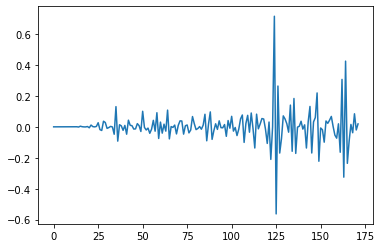

(102, 20)


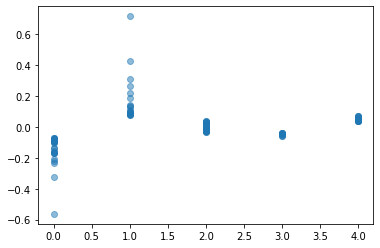

In [ ]:
alameda_data = CA_combined_data[CA_combined_data['County Name'] == 'Los Angeles County']

new_cases_1k_la_list = alameda_data['New Cases/1k population'].values
diffArr = np.diff(new_cases_1k_la_list)
growth_values =[]
growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
growth_values.extend(diffArr)

alameda_data['growth_code'] = alameda_data['growth_label'].astype('category').cat.codes
print(pd.unique(alameda_data[['growth_label', 'growth_code']].values.ravel()))
new_cases_1k_la_list = alameda_data['New Cases/1k population'].values
plt.plot(growth_values)
plt.show()
alameda_labelflat_growth = alameda_data[alameda_data['growth_label'] == 'flat_growth']
print(alameda_labelflat_growth.shape)
#alameda_labelflat_growth

N = 5
x = alameda_data['growth_code'].values
y = growth_values #alameda_data['New Cases/1k population'].values
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


## Export to csv

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/'
filename = 'CA_sd_inertia_labeledData_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
CA_combined_sd_inertia_data.to_csv(location+filename,index=False)

CA_sd_inertia_labeledData_Oct11.csv


## 1.Filter-Los Angeles County

In [ ]:
CA_combined_sd_inertia_data_la = CA_combined_sd_inertia_data[CA_combined_sd_inertia_data['CTNAME']== 'Los Angeles County']
CA_combined_sd_inertia_data_la.head(3)

,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label
3816,2020-01-22,California,6037,0,0,0,0,0,6037,Los Angeles County,6,18,19,3.34,10.9,0.3,32.5,0.62,2.72,0,10105518,-1.7,2020-01-22,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
3817,2020-01-23,California,6037,0,0,0,0,0,6037,Los Angeles County,6,15,19,3.43,10.9,0.4,34.7,0.63,2.80,0,10105518,1.2,2020-01-23,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
3818,2020-01-24,California,6037,0,0,0,0,0,6037,Los Angeles County,6,14,18,3.53,11.1,0.4,37.4,0.60,2.93,0,10105518,5.9,2020-01-24,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement


In [ ]:
new_cases_1k_la_list = CA_combined_sd_inertia_data_la['New cases/1000 people'].values

### Finding mean, std. dev

In [ ]:
meanVal= np.mean(new_cases_1k_la_list, axis=0)
stdVal = np.std(new_cases_1k_la_list, axis=0)
print('Mean: ', np.mean(new_cases_1k_la_list, axis=0))
print('Standard Deviation:', np.std(new_cases_1k_la_list, axis=0))

Mean:  0.10537877358490563
Standard Deviation: 0.10129884785989024


### Method to compute normal distribution to label the data 

In [ ]:
  def determine_growth_label_stdev(i,meanVal,stdVal):
    if (i > (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "drastic_growth")
        return 'drastic_growth'
    elif ( i > (meanVal) and i <= (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "mild_growth")
        return 'mild_growth'
    elif (i >= (meanVal - (stdVal * 1) / 3) and i <= meanVal):
        #print("Label: ", i, "flat_growth")
        return 'flat_growth'
    elif (i < (meanVal - (stdVal * 1) / 3) and i >= (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "mild_decrement")
        return 'mild_decrement'
    elif (i < (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "drastic_decrement")
        return 'drastic_decrement'
    

In [ ]:
CA_combined_sd_inertia_data_la['growth_label'] = CA_combined_sd_inertia_data_la['New cases/1000 people'].apply(lambda x: determine_growth_label_stdev(x,meanVal,stdVal) )
CA_combined_sd_inertia_data_la.head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label
3816,2020-01-22,California,6037,0,0,0,0,0,6037,Los Angeles County,6,18,19,3.34,10.9,0.3,32.5,0.62,2.72,0,10105518,-1.7,2020-01-22,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
3817,2020-01-23,California,6037,0,0,0,0,0,6037,Los Angeles County,6,15,19,3.43,10.9,0.4,34.7,0.63,2.80,0,10105518,1.2,2020-01-23,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
3818,2020-01-24,California,6037,0,0,0,0,0,6037,Los Angeles County,6,14,18,3.53,11.1,0.4,37.4,0.60,2.93,0,10105518,5.9,2020-01-24,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
3819,2020-01-25,California,6037,0,0,0,0,0,6037,Los Angeles County,6,25,22,3.24,11.8,0.4,34.6,0.31,2.93,0,10105518,5.9,2020-01-25,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,NaN,NaN,9,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,1,54.0,0.0,0.0,0.0,0,0,drastic_decrement


### Export CSV File

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/'
filename = 'CA_sd_inertia_labeledData_LosAngeles_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
CA_combined_sd_inertia_data_la.to_csv(location+filename,index=False)

CA_sd_inertia_labeledData_LosAngeles_Oct11.csv


In [ ]:
print(CA_combined_sd_inertia_data_la[CA_combined_sd_inertia_data_la['growth_label'] == 'drastic_growth'].shape)
print(CA_combined_sd_inertia_data_la[CA_combined_sd_inertia_data_la['growth_label'] == 'mild_decrement'].shape)
print(CA_combined_sd_inertia_data_la[CA_combined_sd_inertia_data_la['growth_label'] == 'drastic_decrement'].shape)
print(CA_combined_sd_inertia_data_la[CA_combined_sd_inertia_data_la['growth_label'] == 'mild_growth'].shape)
print(CA_combined_sd_inertia_data_la[CA_combined_sd_inertia_data_la['growth_label'] == 'flat_growth'].shape)


(64, 54)
(23, 54)
(73, 54)
(29, 54)
(23, 54)


## 2.Filter-San Diego County

In [ ]:
CA_combined_sd_inertia_data_sd = CA_combined_sd_inertia_data[CA_combined_sd_inertia_data['CTNAME']== 'San Diego County']
CA_combined_sd_inertia_data_sd.head(3)

,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label
7632,2020-01-22,California,6073,0,0,0,0,0,6073,San Diego County,6,17,18,3.45,4.6,0.7,34.9,0.60,2.84,0,3343364,0.8,2020-01-22,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7633,2020-01-23,California,6073,0,0,0,0,0,6073,San Diego County,6,13,17,3.50,5.1,0.7,38.2,0.61,2.88,0,3343364,2.2,2020-01-23,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7634,2020-01-24,California,6073,0,0,0,0,0,6073,San Diego County,6,13,17,3.63,5.4,0.7,39.7,0.58,3.04,0,3343364,7.9,2020-01-24,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement


In [ ]:
new_cases_1k_la_list = CA_combined_sd_inertia_data_sd['New cases/1000 people'].values

### Finding mean, std. dev

In [ ]:
meanVal= np.mean(new_cases_1k_la_list, axis=0)
stdVal = np.std(new_cases_1k_la_list, axis=0)
print('Mean: ', np.mean(new_cases_1k_la_list, axis=0))
print('Standard Deviation:', np.std(new_cases_1k_la_list, axis=0))

Mean:  0.04982216981132076
Standard Deviation: 0.05325510896750634


### Method to compute normal distribution to label the data 

In [ ]:
  def determine_growth_label_stdev(i,meanVal,stdVal):
    if (i > (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "drastic_growth")
        return 'drastic_growth'
    elif ( i > (meanVal) and i <= (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "mild_growth")
        return 'mild_growth'
    elif (i >= (meanVal - (stdVal * 1) / 3) and i <= meanVal):
        #print("Label: ", i, "flat_growth")
        return 'flat_growth'
    elif (i < (meanVal - (stdVal * 1) / 3) and i >= (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "mild_decrement")
        return 'mild_decrement'
    elif (i < (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "drastic_decrement")
        return 'drastic_decrement'
    

In [ ]:
CA_combined_sd_inertia_data_sd['growth_label'] = CA_combined_sd_inertia_data_sd['New cases/1000 people'].apply(lambda x: determine_growth_label_stdev(x,meanVal,stdVal) )
CA_combined_sd_inertia_data_sd.head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label
7632,2020-01-22,California,6073,0,0,0,0,0,6073,San Diego County,6,17,18,3.45,4.6,0.7,34.9,0.60,2.84,0,3343364,0.8,2020-01-22,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7633,2020-01-23,California,6073,0,0,0,0,0,6073,San Diego County,6,13,17,3.50,5.1,0.7,38.2,0.61,2.88,0,3343364,2.2,2020-01-23,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7634,2020-01-24,California,6073,0,0,0,0,0,6073,San Diego County,6,13,17,3.63,5.4,0.7,39.7,0.58,3.04,0,3343364,7.9,2020-01-24,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7635,2020-01-25,California,6073,0,0,0,0,0,6073,San Diego County,6,25,22,3.26,6.3,0.8,37.0,0.30,2.96,0,3343364,5.0,2020-01-25,2.9,19,74855,4.7,33.5,50.32,730,407,143,2.05,0.22,NaN,NaN,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,1,54.0,0.0,0.0,0.0,0,0,drastic_decrement


### Export CSV File

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/'
filename = 'CA_sd_inertia_labeledData_sandiego_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
CA_combined_sd_inertia_data_sd.to_csv(location+filename,index=False)

CA_sd_inertia_labeledData_sandiego_Oct11.csv


In [ ]:
print(CA_combined_sd_inertia_data_sd[CA_combined_sd_inertia_data_sd['growth_label'] == 'drastic_growth'].shape)
print(CA_combined_sd_inertia_data_sd[CA_combined_sd_inertia_data_sd['growth_label'] == 'mild_decrement'].shape)
print(CA_combined_sd_inertia_data_sd[CA_combined_sd_inertia_data_sd['growth_label'] == 'drastic_decrement'].shape)
print(CA_combined_sd_inertia_data_sd[CA_combined_sd_inertia_data_sd['growth_label'] == 'mild_growth'].shape)
print(CA_combined_sd_inertia_data_sd[CA_combined_sd_inertia_data_sd['growth_label'] == 'flat_growth'].shape)


(59, 54)
(37, 54)
(66, 54)
(11, 54)
(39, 54)


## 3.Filter-San Bernardino County

In [ ]:
CA_combined_sd_inertia_data_sb = CA_combined_sd_inertia_data[CA_combined_sd_inertia_data['CTNAME']== 'San Bernardino County']
CA_combined_sd_inertia_data_sb.head(3)

,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label
7420,2020-01-22,California,6071,0,0,0,0,0,6071,San Bernardino County,6,15,18,3.53,25.3,1.9,46.3,0.62,2.92,0,2171603,0.6,2020-01-22,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7421,2020-01-23,California,6071,0,0,0,0,0,6071,San Bernardino County,6,13,17,3.62,25.6,2.0,48.5,0.63,2.99,0,2171603,3.0,2020-01-23,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7422,2020-01-24,California,6071,0,0,0,0,0,6071,San Bernardino County,6,13,16,3.77,25.8,2.4,50.4,0.61,3.16,0,2171603,8.9,2020-01-24,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement


In [ ]:
new_cases_1k_la_list = CA_combined_sd_inertia_data_sb['New cases/1000 people'].values

### Finding mean, std. dev

In [ ]:
meanVal= np.mean(new_cases_1k_la_list, axis=0)
stdVal = np.std(new_cases_1k_la_list, axis=0)
print('Mean: ', np.mean(new_cases_1k_la_list, axis=0))
print('Standard Deviation:', np.std(new_cases_1k_la_list, axis=0))

Mean:  0.09443490566037738
Standard Deviation: 0.12868128761243755


### Method to compute normal distribution to label the data 

In [ ]:
  def determine_growth_label_stdev(i,meanVal,stdVal):
    if (i > (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "drastic_growth")
        return 'drastic_growth'
    elif ( i > (meanVal) and i <= (meanVal + (stdVal * 1) / 3)):
        #print("Label: ", i, "mild_growth")
        return 'mild_growth'
    elif (i >= (meanVal - (stdVal * 1) / 3) and i <= meanVal):
        #print("Label: ", i, "flat_growth")
        return 'flat_growth'
    elif (i < (meanVal - (stdVal * 1) / 3) and i >= (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "mild_decrement")
        return 'mild_decrement'
    elif (i < (meanVal - (stdVal * 2) / 3)):
        #print("Label: ", i, "drastic_decrement")
        return 'drastic_decrement'
    

In [ ]:
CA_combined_sd_inertia_data_sb['growth_label'] = CA_combined_sd_inertia_data_sb['New cases/1000 people'].apply(lambda x: determine_growth_label_stdev(x,meanVal,stdVal) )
CA_combined_sd_inertia_data_sb.head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label
7420,2020-01-22,California,6071,0,0,0,0,0,6071,San Bernardino County,6,15,18,3.53,25.3,1.9,46.3,0.62,2.92,0,2171603,0.6,2020-01-22,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7421,2020-01-23,California,6071,0,0,0,0,0,6071,San Bernardino County,6,13,17,3.62,25.6,2.0,48.5,0.63,2.99,0,2171603,3.0,2020-01-23,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7422,2020-01-24,California,6071,0,0,0,0,0,6071,San Bernardino County,6,13,16,3.77,25.8,2.4,50.4,0.61,3.16,0,2171603,8.9,2020-01-24,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement
7423,2020-01-25,California,6071,0,0,0,0,0,6071,San Bernardino County,6,27,21,3.29,27.1,2.3,45.3,0.31,2.99,0,2171603,3.0,2020-01-25,1.5,16,60164,7.9,52.8,49.75,106,35,98,2.05,0.22,NaN,NaN,4,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,1,54.0,0.0,0.0,0.0,0,0,drastic_decrement


### Export CSV File

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/'
filename = 'CA_sd_inertia_labeledData_SanBernardino_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
CA_combined_sd_inertia_data_sb.to_csv(location+filename,index=False)

CA_sd_inertia_labeledData_SanBernardino_Oct11.csv


In [ ]:
print(CA_combined_sd_inertia_data_sb[CA_combined_sd_inertia_data_sb['growth_label'] == 'drastic_growth'].shape)
print(CA_combined_sd_inertia_data_sb[CA_combined_sd_inertia_data_sb['growth_label'] == 'mild_decrement'].shape)
print(CA_combined_sd_inertia_data_sb[CA_combined_sd_inertia_data_sb['growth_label'] == 'drastic_decrement'].shape)
print(CA_combined_sd_inertia_data_sb[CA_combined_sd_inertia_data_sb['growth_label'] == 'mild_growth'].shape)
print(CA_combined_sd_inertia_data_sb[CA_combined_sd_inertia_data_sb['growth_label'] == 'flat_growth'].shape)


(57, 54)
(53, 54)
(70, 54)
(10, 54)
(22, 54)
